<img src="./Logo_UNSAM.png" align="right" width="150" />

#### Procesamiento Digital de Señales
# Trabajo Práctico Nº2
#### Lucas Marú

# Enunciado

Hallar analíticamente la función de transferencia  H(s)=Vo(s)Vi(s)
 
Calcular y graficar la respuesta de módulo y fase, indicando la respuesta asintótica donde corresponda.
Responda: ¿De qué tipo de filtro se trata? ¿Cuál es el ancho de banda del filtro?

## Circuito 1
<img src="./circuito1.png" align="center" width="400" />


Hallo la respuesta en frecuencia del filtro planteando un divisor de tensión entre la resistencia R y la impedancia serie equivalente del capacitor con la bobina, obteniendo:
\begin{equation}
H(s) = \frac{V_{out}}{V_{in}} = \frac{\frac{w_{0}}{q}s}{s^2 + \frac{w_{0}}{q}s + w_{0}^2}; \quad w_0^2 = \frac {R}{LC} ; \quad q = \sqrt{\frac {L}{CR}}
\end{equation}

Este es un tipo de filtro **pasa banda** por lo que el ancho de banda esta definido por los puntos en que la atenuación es igual a -3dB o lo que es lo mismo los valores en que el módulo de la función transferencia es igual a 0,7071.

\begin{equation}
|H(s)| = \frac{\frac{w_{0}w}{q}}{\sqrt{(w_{0}^2-w^2)^2+ (\frac{w_{0}w}{q}})^2} = \frac{\sqrt{2}}{2} \approx 0,7071
\end{equation}

\begin{equation}
\Rightarrow w_{1}=0,5176        \, \land\!	\quad w_{2}=1.9318
\end{equation}

\begin{equation}
\therefore BW=w_{2}-w_{1}=1,4142 \approx \sqrt{2}
\end{equation}

A continuación detallo el código de python utilizado para realizar el diagrama de bode:

(1,
 array([<AxesSubplot: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <AxesSubplot: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [deg]'>],
       dtype=object))

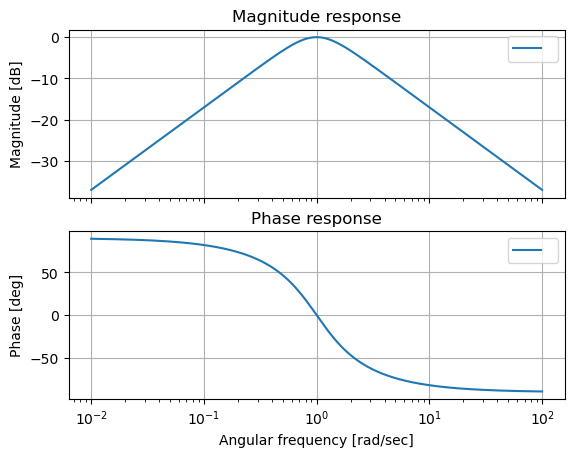

In [3]:
                                        from splane import bodePlot
from scipy.signal import TransferFunction
import numpy as np


# Definición de parámetros
Wo = 1
#Q = 5 # para visualizar los cambios con distintos Q
Q = np.sqrt(2)/2

# Definición de la función de transferencia H(s) = s^2 / (s^2 + Wo/Q s + Wo^2)
numerador = [0,Wo/Q, 0]  
denominador = [1, Wo/Q, Wo**2]

H = TransferFunction(numerador, denominador)

# Gráfica de Bode
bodePlot(H)


## Discusión de resultado 1

En este filtro hay una aparente relación entre el que y el BW. Numéricamente me está dando que vale la mitad, no me doy cuenta del porque la relación aunque investigando hay una fórmula que relaciona el ancho de banda con el cociente de la pulsación natural y el q, pero no me resulta intuitiva. 
Me llamó la atención que al jugar con distintos que (manteniendo la frecuencia normalizada) este filtro no produce sobre paso en la tensión, solo angosta el ancho de banda haciéndose más selectivo.

## Circuito 2
<img src="./circuito2.png" align="center" width="400" />

Nuevamente utilizamos un divisor de tensión para hallar la función transferencia pero esta vez entre la impedancia del capacitor y la impedancia paralelo equivalente de la resistencia con la bobina, obteniendo:
\begin{equation}
H(s) = \frac{V_{out}}{V_{in}} = \frac{s^{2}}{s^2 + \frac{w_{0}}{q}s + w_{0}^2}; \quad w_0^2 = \frac {1}{CL} ; \quad q = \sqrt{\frac {CR}{L}}
\end{equation}
Este es un tipo de filtro **pasa alto** por lo que el ancho de banda, o mejor dicho la banda de paso, esta definida desde la frecuencia de corte en adelante. Siendo la frecuencia de corte el valor en que la atenuación es de -3dB.
Como la frecuencia está normalizada el valor del módulo de H en la frecuencia que corresponde a la pulsación natural depende unicamente del valor de q, es decir:

\begin{equation}
\left| H(j\omega) \right|_{\omega = \omega_0} = Q 
\quad \Rightarrow \quad 
20 \log(Q) = -3{,}01\,\text{dB} \approx -3\,\text{dB}
\end{equation}

\begin{equation}
\quad \Rightarrow \quad 
\omega_c = \omega_0 
\quad \therefore \quad 
\text{BW} = (\omega_c,\,+\infty)
\end{equation}


Modificando el código utilizado antes:

(1,
 array([<AxesSubplot: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <AxesSubplot: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [deg]'>],
       dtype=object))

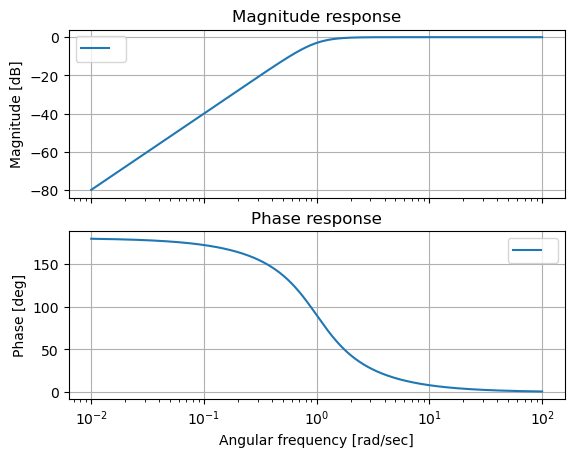

In [4]:
from splane import bodePlot
from scipy.signal import TransferFunction
import numpy as np


# Definición de parámetros
Wo = 1
#Q = 5 # para visualizar los cambios con distintos Q
Q = np.sqrt(2)/2

# Definición de la función de transferencia H(s) = s^2 / (s^2 + Wo/Q s + Wo^2)
numerador = [1, 0, 0]  
denominador = [1, Wo/Q, Wo**2]

H = TransferFunction(numerador, denominador)

# Gráfica de Bode
bodePlot(H)

## Discusión de resultado 2

El procedimiento para la construcción del ejercicio fue muy similar al primero y me resulto considerablemente más fácil. Me queda la duda de porque el circuito para altos que genera un sobre paso de tensión o sea que para ciertas frecuencias la respuesta en módulo del filtro es amplificar la tensión de entrada, es llamativo siendo que no hay elementos que entreguen energía. Me llevo la consulta para las clases.

## Conclusión y observaciones

Tuve inconveniente a la hora de intentar importar el módulo "control" de python y no puede realizar el diagrama de bode de la manera en la que lo hacía con matlab.
Para poder realizar los gráficos extraje de un video de youtoube https://www.youtube.com/watch?v=KP8oI1fXj8U&t=461s del canal del profesor de esta misma cátedra donde se usa un módulo alternativo "splane". Este módulo externo a python lo extraje del repositorio de github: https://github.com/agalbachicar/splane/blob/master/src/tc2/splane.py 
Con esto pude realizar los gráficos sin problemas y coinciden con los realizado a mano.

Con respecto a la práctica cometí múltiples errores a la hora de calcular la fase de la función transferencia con lápiz y papel, lo que me invita a reforzar el entendimiento del diagrama de polos y ceros del que no tengo hoy por hoy claro como funciona y por lo que entiendo facilita una manera intuitiva de entender la función transferencia.

Con respecto a lo conceptual el diagrama de fase no me aporta ninguna información sobre el circuito necesito consultar al respecto.